In [1]:
# import most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [2]:
# create column names
column_names = ['user_id','item_id','rating', 'timestamp']

In [3]:
# import raw data of reviews per user
df = pd.read_csv('https://raw.githubusercontent.com/koen-d-r/udemy_movie_recommender/master/u.data',sep='\t',names=column_names)

In [4]:
# check first reviews
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
# import movie titles
movie_titles = pd.read_csv('https://raw.githubusercontent.com/koen-d-r/udemy_movie_recommender/master/Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
# merge files
df = pd.merge(df,movie_titles,on='item_id')

In [8]:
# check first 25 rows
df.head(25)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [9]:
# calculate average movie rating per movie
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
# create df with mean ratings per movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
# check first ratings
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
# create extra column with sum of ratings
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [13]:
# sort num_of_ratings column
ratings.sort_values(['num_of_ratings'],ascending=False,inplace=True)

In [14]:
# highest rating per movie
ratings['max_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].max())

In [16]:
ratings[(ratings['rating']>4)&(ratings['num_of_ratings']>300)]

,rating,num_of_ratings,max_of_ratings
title,,,
Star Wars (1977),4.359589,584,5
Fargo (1996),4.155512,508,5
Return of the Jedi (1983),4.007890,507,5
Raiders of the Lost Ark (1981),4.252381,420,5
"Godfather, The (1972)",4.283293,413,5
Pulp Fiction (1994),4.060914,394,5
"Silence of the Lambs, The (1991)",4.289744,390,5
"Empire Strikes Back, The (1980)",4.206522,368,5
Titanic (1997),4.245714,350,5


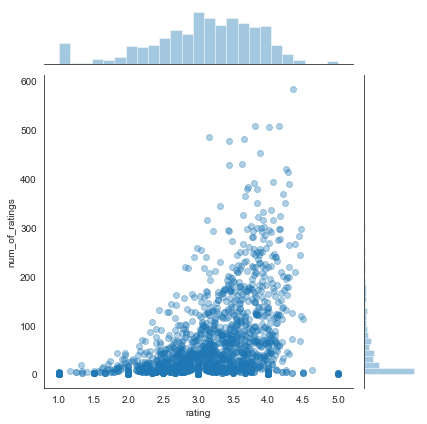

In [20]:
# create sns.jointplot to show the far majority of movies have less than 100 ratings
sns.jointplot('rating','num_of_ratings',ratings,alpha=0.35)

In [21]:
# create huge table with every user (user_id) and movie title 
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [22]:
# check moviemat table
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# create recommendations for Star Wars (1977) and LiarLiar (1997)
sw_user_ratings = moviemat['Star Wars (1977)']
ll_user_ratings = moviemat['Liar Liar (1997)']

In [36]:
sw_user_ratings.dropna(inplace=True)

In [37]:
sw = pd.DataFrame(moviemat.corrwith(sw_user_ratings))

In [40]:
sw.sort_values(0, ascending = False)

,0
title,
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Man of the Year (1995),1.000000
Hollow Reed (1996),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Good Man in Africa, A (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


In [41]:
# add number of ratings per movie
sw = sw.join(ratings['num_of_ratings'])

In [42]:
# only show recommendations with more than 100 ratings and sort
sw[sw['num_of_ratings']>100].sort_values(0,ascending=False)

,0,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [ ]:
ll_user_ratings.dropna(inplace=True)

In [28]:
ll = pd.DataFrame(moviemat.corrwith(ll_user_ratings))

In [29]:
ll = ll.join(ratings['num_of_ratings'])

In [30]:
ll.rename(columns={0: 'Correlation'},inplace=True)


In [31]:
ll[ll['num_of_ratings']>250].sort_values('Correlation',ascending=False)

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Indiana Jones and the Last Crusade (1989),0.414427,331
Back to the Future (1985),0.378028,350
Jurassic Park (1993),0.370770,261
"Saint, The (1997)",0.362803,316
"Shawshank Redemption, The (1994)",0.354533,283
Mission: Impossible (1996),0.348885,344
Toy Story (1995),0.342576,452
Ransom (1996),0.324892,267
